In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
# from src.utils import program_to_dsl, dsl_to_program
import seaborn as sns

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

budget: 20
budget: 20, # data: 20, f1_median: 0.827, runtime_median: 134.0
budget: 20, # data: 20, f1_median: 0.606, runtime_median: 147.0
budget: 20, # data: 20, f1_median: 0.668, runtime_median: 149.0
budget: 20, # data: 20, f1_median: 0.872, runtime_median: 122.0
budget: 20, # data: 20, f1_median: 0.791, runtime_median: 138.0
budget: 20, # data: 20, f1_median: 0.74, runtime_median: 140.0
budget: 20, # data: 20, f1_median: 0.456, runtime_median: 126.0
budget: 20, # data: 20, f1_median: 0.854, runtime_median: 126.0
budget: 20, # data: 20, f1_median: 0.558, runtime_median: 134.0
budget: 20, # data: 20, f1_median: 0.277, runtime_median: 120.0
budget: 20, # data: 20, f1_median: 0.576, runtime_median: 124.0
budget: 20, # data: 20, f1_median: 0.749, runtime_median: 134.0
budget: 20, # data: 20, f1_median: 0.408, runtime_median: 120.0
budget: 20, # data: 20, f1_median: 0.854, runtime_median: 148.0
budget: 20, # data: 20, f1_median: 0.87, runtime_median: 157.0
budget: 20, # data: 20, f1_medi

budget: 50, # data: 20, f1_median: 0.847, runtime_median: 735.0
budget: 50, # data: 20, f1_median: 0.952, runtime_median: 712.0
budget: 50, # data: 20, f1_median: 0.903, runtime_median: 809.0
budget: 50, # data: 20, f1_median: 0.804, runtime_median: 780.0


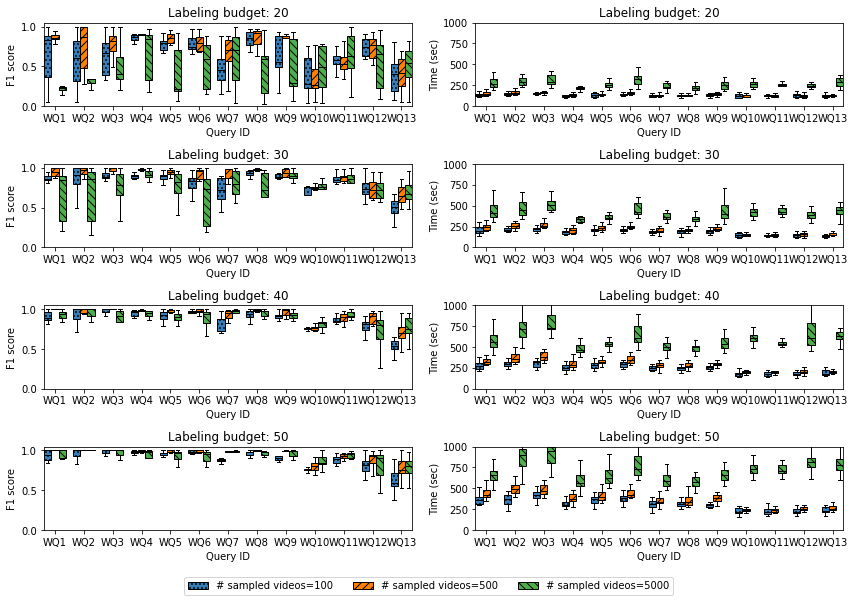

In [34]:
def plot_scene_graph(budgets):
    query_strs = [
        "(DistanceSmall_100.0(o0, o1), Eastward2(o0), Eastward2(o1))",
        "(DistanceSmall_100.0(o0, o1), Eastward3(o0), Eastward3(o1))",
        "(DistanceSmall_100.0(o0, o1), Eastward4(o0), Eastward4(o1))",
        "(Eastward2(o0), HighAccel_2.0(o0)); (Eastward2(o1), HighAccel_2.0(o1))",
        "(Eastward3(o0), HighAccel_2.0(o0)); (Eastward3(o1), HighAccel_2.0(o1))",
        "(Eastward4(o0), HighAccel_2.0(o0)); (Eastward4(o1), HighAccel_2.0(o1))",
        "(Southward1Upper(o0), Westward2(o1)); (Westward2(o0), Westward2(o1))",
        "(Eastward2(o0), Eastward4(o1)); (Eastward2(o0), Eastward3(o1))",
        "(Eastward2(o1), Eastward4(o0)); (Eastward2(o1), Eastward3(o0))",
        "Duration((DistanceSmall_100.0(o0, o1), Eastward2(o1), Eastward3(o0)), 5)",
        "Duration((DistanceSmall_100.0(o0, o1), Eastward3(o1), Eastward4(o0)), 5)",
        "Duration((Eastward2(o1), Eastward3(o0), Faster_1.5(o0, o1)), 5)",
        "Duration((Eastward3(o1), Eastward4(o0), Faster_1.5(o0, o1)), 5)"
    ]
    
    fig, axs = plt.subplots(len(budgets), 2, figsize = (12, 2*len(budgets))) 
    
    exp_dir = "/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/outputs/warsaw/stats/"
    
    n_sampled_videos_list = [100, 500, 5000]
    hatch_list = ['...', '///', '\\\\\\', 'xxx']
    position_offsets = list(range(-len(n_sampled_videos_list), 0, 1))
    legend_labels = []
    for col_id, budget in enumerate(budgets):
        print("budget:", budget)
        query_id = ["WQ{}".format(i) for i in range(1, len(query_strs) + 1)]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []
        
#         # Quivr
#         quivr_f1_data = []
#         quivr_runtime_data = []
#         for query_str in query_strs:
#             quivr_f1 = []
#             quivr_runtime = []
#             try:
#                 for run in range(20):
#                     with open(os.path.join(exp_dir, 
#                                            "stats", 
#                                            "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None",
#                                            "{}-{}.json".format(query_str, run)), "r") as f:
#                         quivr_stats = json.load(f)
#                     quivr_runtime_per_run = quivr_stats["runtime"]
#                     quivr_f1_per_run = quivr_stats["score_median"]
#                     quivr_f1.append(quivr_f1_per_run)
#                     quivr_runtime.append(quivr_runtime_per_run)

#                 quivr_x = list(range(12, 51))
#                 x_idx = quivr_x.index(budget)
#                 quivr_f1 = np.array(quivr_f1)
#                 quivr_runtime = np.array(quivr_runtime)
#                 quivr_f1 = quivr_f1[:, x_idx]
#                 quivr_runtime = quivr_runtime[:, x_idx]        
#             except Exception as err:
#                 print(err)
#                 pass
#             quivr_f1_data.append(np.median(quivr_f1))
#             quivr_runtime_data.append(np.median(quivr_runtime))
#         axs[col_id].bar(np.array(range(len(quivr_f1_data)))*4-2, quivr_f1_data, 1, label="Quivr", color=CB_color_cycle[1], hatch = '//', edgecolor="black")
#         print("quivr", quivr_f1_data)
        
        # VOCAL
        for idx, n_sampled_videos in enumerate(n_sampled_videos_list):
            
            f1_data = []
            runtime_data = []
            for qid, query_str in enumerate(query_strs):
                if qid < 9 and n_sampled_videos in [100, 500]:
                    config_name = "vocal_postgres-topk-max_d_1-n_sampled_videos_{}".format(n_sampled_videos)
                else:
                    config_name = "vocal_postgres-topk" if n_sampled_videos == 100 else "vocal_postgres-topk-n_sampled_videos_{}".format(n_sampled_videos)
                f1 = []
                runtime = []
                try:
                    with open(os.path.join(exp_dir, config_name, "{}.json".format(query_str)), "r") as f:
                        stats = json.load(f)
                    x = [15, 20, 25, 30, 40, 50]
                    x_idx = x.index(budget)
                    runtime = np.array(stats["runtime"])
                    f1 = np.array(stats["score_median"])
                    f1 = f1[:, x_idx]
                    runtime = runtime[:, x_idx]
                    if np.all(f1 == -1):
                        f1 = np.zeros_like(f1)
                    else:
                        f1[f1 == -1] = np.nan
                    f1 = f1[~np.isnan(f1)]
                    if np.all(runtime == -1):
                        runtime = np.zeros_like(runtime)
                    else:
                        runtime[runtime == -1] = np.nan
                    runtime = runtime[~np.isnan(runtime)]
                except:
                    pass
                print("budget: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, len(f1), np.round(np.median(f1), 3), np.round(np.median(runtime))))
                f1_data.append(f1)
                runtime_data.append(runtime)  

            bp_f1 = axs[col_id][0].boxplot(f1_data, 
                           positions=np.array(range(len(f1_data)))*(len(n_sampled_videos_list)+1)+position_offsets[idx], 
                           sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[idx], hatch = hatch_list[idx]),
                           medianprops = dict(color='black'))   
            bp_runtime = axs[col_id][1].boxplot(runtime_data, 
                           positions=np.array(range(len(f1_data)))*(len(n_sampled_videos_list)+1)+position_offsets[idx], 
                           sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[idx], hatch = hatch_list[idx]),
                           medianprops = dict(color='black'))   
            handles_f1.append(bp_f1["boxes"][0])
            handles_runtime.append(bp_runtime["boxes"][0])
            legend_labels.append("# sampled videos={}".format(n_sampled_videos))
            
            axs[col_id][0].set(xlabel="Query ID", ylabel="F1 score")
            axs[col_id][0].set_ylim(bottom=0, top=1.05)
            
            axs[col_id][0].set_xticks(range(-(len(n_sampled_videos_list)+1)//2, len(query_id)*(len(n_sampled_videos_list)+1)-(len(n_sampled_videos_list)+1)//2, len(n_sampled_videos_list)+1))
            axs[col_id][0].set_xticklabels(query_id)
            axs[col_id][0].title.set_text("Labeling budget: {}".format(budget))

            axs[col_id][1].set(xlabel="Query ID", ylabel="Time (sec)")
            axs[col_id][1].set_xticks(range(-(len(n_sampled_videos_list)+1)//2, len(query_id)*(len(n_sampled_videos_list)+1)-(len(n_sampled_videos_list)+1)//2, len(n_sampled_videos_list)+1))
            axs[col_id][1].set_xticklabels(query_id)
            axs[col_id][1].title.set_text("Labeling budget: {}".format(budget))
            axs[col_id][1].set_ylim(bottom=0, top=1000)
            
#     for ax in axs.flat:
#         ax.label_outer()
    fig.legend(handles_f1, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=3)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    
plot_scene_graph(budgets=[20, 30, 40, 50])